# Data curation of Boughter, Jain and Shehata

## Import libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import matplotlib.pylab as pylab
from matplotlib.ticker import PercentFormatter
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
import seaborn as sns  

import os
import glob
current_directory = os.getcwd()
os.chdir(current_directory)

## Load and curate data:

In [2]:
Data_Boughter = pd.read_excel("./Data/Datasets/eLife_full_dataset.xlsx", index_col=0)

# Clean up - remove rows containing /* or X in CDRs:
Data_Boughter = Data_Boughter[~Data_Boughter['H-CDR1'].str.contains('\*|X')]
Data_Boughter = Data_Boughter[~Data_Boughter['H-CDR2'].str.contains('\*|X')]
Data_Boughter = Data_Boughter[~Data_Boughter['H-CDR3'].str.contains('\*|X')]
Data_Boughter = Data_Boughter[~Data_Boughter['L-CDR1'].str.contains('\*|X')]
Data_Boughter = Data_Boughter[~Data_Boughter['L-CDR2'].str.contains('\*|X')]
Data_Boughter = Data_Boughter[~Data_Boughter['L-CDR3'].str.contains('\*|X')]
Data_Boughter = Data_Boughter[~Data_Boughter['VH full'].isna()]
Data_Boughter = Data_Boughter[~Data_Boughter['VL full'].isna()]
Data_Boughter.reset_index(drop=True, inplace=True) # reset index


# --- Join seq/CDRs and create separate columns:
# Join VH/VL:
Data_Boughter['VH_VL_joined']=Data_Boughter['VH full']+Data_Boughter['VL full']

# Join L-CDRs and H-CDRs:
Data_Boughter['HL-CDRs_joined']=Data_Boughter['H-CDR1']+Data_Boughter['H-CDR2']+Data_Boughter['H-CDR3']+Data_Boughter['L-CDR1']+Data_Boughter['L-CDR2']+Data_Boughter['L-CDR3']

# Join H-CDRs:
Data_Boughter['H-CDRs_joined']=Data_Boughter['H-CDR1']+Data_Boughter['H-CDR2']+Data_Boughter['H-CDR3']

# Join L-CDRs:
Data_Boughter['L-CDRs_joined']=Data_Boughter['L-CDR1']+Data_Boughter['L-CDR2']+Data_Boughter['L-CDR3']

# --- Beautify pandas table:
Data_Boughter = Data_Boughter.rename(columns = {'#Flags':'react','VH full':'VH','VL full':'VL'})
Data_Boughter['#Flags'] = list(Data_Boughter['react'])
Data_Boughter['Name'] = [i for i in range(len(Data_Boughter['VH']))]
Data_Boughter['Dataset'] = ['Boughter' for i in range(len(Data_Boughter['VH']))]
Data_Boughter = Data_Boughter[['Name','Ab type', 'Dataset', 'L-CDR1', 'L-CDR2', 'L-CDR3', 'H-CDR1', 'H-CDR2', 'H-CDR3', 
             'VH', 'VL', 'VH_VL_joined', 'HL-CDRs_joined',
             'H-CDRs_joined', 'L-CDRs_joined','react']]


# ---  Load Jain & Shehata data:
# Jain data (new file to include all sequences):
Data_Jain = pd.read_excel('./Data/Datasets/Jain_mAbs_sequences.xlsx',index_col=0)
Data_Jain['react'] = list(Data_Jain['#Flags'])
Data_Jain['Dataset'] = ['Jain' for i in range(len(Data_Jain['#Flags']))]

Data_Jain['VH_VL_joined']=Data_Jain['VH']+Data_Jain['VL']
Data_Jain['HL-CDRs_joined']=Data_Jain['H-CDR1']+Data_Jain['H-CDR2']+Data_Jain['H-CDR3']+Data_Jain['L-CDR1']+Data_Jain['L-CDR2']+Data_Jain['L-CDR3']
Data_Jain['H-CDRs_joined']=Data_Jain['H-CDR1']+Data_Jain['H-CDR2']+Data_Jain['H-CDR3']
Data_Jain['L-CDRs_joined']=Data_Jain['L-CDR1']+Data_Jain['L-CDR2']+Data_Jain['L-CDR3']
Data_Jain['Name'] = [i for i in range(len(Data_Jain['VH']))]

# Shehata data:
Data_Shehata = pd.read_excel('./Data/Datasets/Shehata_mAbs_sequences.xlsx',index_col=0)
Data_Shehata['Name'] = Data_Shehata['Clone name']
Data_Shehata['Dataset'] = ['Shehata' for i in range(len(Data_Shehata['Clone name']))]
Data_Shehata['react'] = [0 if i<0.33 else 1 for i in list(Data_Shehata['PSR Score'])]

Data_Shehata['VH_VL_joined']=Data_Shehata['VH']+Data_Shehata['VL']
Data_Shehata['HL-CDRs_joined']=Data_Shehata['H-CDR1']+Data_Shehata['H-CDR2']+Data_Shehata['H-CDR3']+Data_Shehata['L-CDR1']+Data_Shehata['L-CDR2']+Data_Shehata['L-CDR3']
Data_Shehata['H-CDRs_joined']=Data_Shehata['H-CDR1']+Data_Shehata['H-CDR2']+Data_Shehata['H-CDR3']
Data_Shehata['L-CDRs_joined']=Data_Shehata['L-CDR1']+Data_Shehata['L-CDR2']+Data_Shehata['L-CDR3']

# Assemble into one df:
Data = pd.concat([Data_Boughter[['Name','Ab type','Dataset', 'L-CDR1', 'L-CDR2', 'L-CDR3', 'H-CDR1', 'H-CDR2', 'H-CDR3', 'VH', 'VL', 'VH_VL_joined', 'HL-CDRs_joined','H-CDRs_joined', 'L-CDRs_joined','react']],
                       Data_Jain[['Name','Dataset','L-CDR1', 'L-CDR2', 'L-CDR3', 'H-CDR1', 'H-CDR2', 'H-CDR3','VH','VL','VH_VL_joined','HL-CDRs_joined','H-CDRs_joined','L-CDRs_joined','react']], 
                       Data_Shehata[['Name','Dataset','L-CDR1', 'L-CDR2', 'L-CDR3', 'H-CDR1', 'H-CDR2', 'H-CDR3','VH','VL','VH_VL_joined','HL-CDRs_joined','H-CDRs_joined','L-CDRs_joined','react','PSR Score']]], 
                       axis=0)

Data.reset_index(drop=True, inplace=True)

Data

<>:4: SyntaxWarning: invalid escape sequence '\*'
<>:5: SyntaxWarning: invalid escape sequence '\*'
<>:6: SyntaxWarning: invalid escape sequence '\*'
<>:7: SyntaxWarning: invalid escape sequence '\*'
<>:8: SyntaxWarning: invalid escape sequence '\*'
<>:9: SyntaxWarning: invalid escape sequence '\*'
<>:4: SyntaxWarning: invalid escape sequence '\*'
<>:5: SyntaxWarning: invalid escape sequence '\*'
<>:6: SyntaxWarning: invalid escape sequence '\*'
<>:7: SyntaxWarning: invalid escape sequence '\*'
<>:8: SyntaxWarning: invalid escape sequence '\*'
<>:9: SyntaxWarning: invalid escape sequence '\*'
/tmp/ipykernel_72273/4072799282.py:4: SyntaxWarning: invalid escape sequence '\*'
  Data_Boughter = Data_Boughter[~Data_Boughter['H-CDR1'].str.contains('\*|X')]
/tmp/ipykernel_72273/4072799282.py:5: SyntaxWarning: invalid escape sequence '\*'
  Data_Boughter = Data_Boughter[~Data_Boughter['H-CDR2'].str.contains('\*|X')]
/tmp/ipykernel_72273/4072799282.py:6: SyntaxWarning: invalid escape sequence '

,Name,Ab type,Dataset,L-CDR1,L-CDR2,L-CDR3,H-CDR1,H-CDR2,H-CDR3,VH,VL,VH_VL_joined,HL-CDRs_joined,H-CDRs_joined,L-CDRs_joined,react,PSR Score
0,0,Mouse IgA,Boughter,TDIDDD,EGN,LQSDNMPYTF,GYSITSDY,ISYSGST,ARRGYYYGSFDYW,QVQLKQSGPGLAKPSQTLSLTCSVTGYSITSDYWNWIRKFPGNKLE...,DIQMTQSPASLSVATGEKVTIRCITSTDIDDDMNWYQQKPGEPPKL...,QVQLKQSGPGLAKPSQTLSLTCSVTGYSITSDYWNWIRKFPGNKLE...,GYSITSDYISYSGSTARRGYYYGSFDYWTDIDDDEGNLQSDNMPYTF,GYSITSDYISYSGSTARRGYYYGSFDYW,TDIDDDEGNLQSDNMPYTF,0,NaN
1,1,Mouse IgA,Boughter,QEISGY,AAS,LQYASYPPTF,GYTFTSYW,IHPSDSDT,AIDYDQAMDYW,HSQLQESGAELVKPGASVKVSCKASGYTFTSYWMHWVKQRPGQGLE...,DIQMNQSPSSLSASLGERVSLTCRASQEISGYLSWLQQKPDGTIKR...,HSQLQESGAELVKPGASVKVSCKASGYTFTSYWMHWVKQRPGQGLE...,GYTFTSYWIHPSDSDTAIDYDQAMDYWQEISGYAASLQYASYPPTF,GYTFTSYWIHPSDSDTAIDYDQAMDYW,QEISGYAASLQYASYPPTF,0,NaN
2,2,Mouse IgA,Boughter,QDVGTA,WAS,QQYSSYPFTF,GYSITSGYY,ISYDGS,ARFYGNYEDYYAMDYW,QVQLKQSGPGLVKPSQSLSLTCSVTGYSITSGYYWNWIRQFPGNKL...,ETTVTQSHKFMSTSVGDRVSITCKASQDVGTAVAWYQQKPGQSPKL...,QVQLKQSGPGLVKPSQSLSLTCSVTGYSITSGYYWNWIRQFPGNKL...,GYSITSGYYISYDGSARFYGNYEDYYAMDYWQDVGTAWASQQYSSY...,GYSITSGYYISYDGSARFYGNYEDYYAMDYW,QDVGTAWASQQYSSYPFTF,0,NaN
3,3,Mouse IgA,Boughter,QDIGSS,AT,LQYASSPWTF,GFTFTDYY,IRNKANGYTT,ARLDSSGYDYAMDYW,EVQLLETGGGLVQPGGSLSLSCAASGFTFTDYYMSWVRQPPGKALE...,DIQMNQSPSSLSASLGERVSLTCRASQDIGSSLNWLQQEPDGTIKR...,EVQLLETGGGLVQPGGSLSLSCAASGFTFTDYYMSWVRQPPGKALE...,GFTFTDYYIRNKANGYTTARLDSSGYDYAMDYWQDIGSSATLQYAS...,GFTFTDYYIRNKANGYTTARLDSSGYDYAMDYW,QDIGSSATLQYASSPWTF,0,NaN
4,4,Mouse IgA,Boughter,QSIGTS,YAS,QQSNSWPLTF,GFTFSSYG,ISSGGSYT,ARQEGNSGEYYFDYW,EVKLEESGGDLVKPGGSLKLSCAASGFTFSSYGMSWVRQTPDKRLE...,ENVLTQSPAILSVSPGERVSFSCRASQSIGTSIHWYQQRTNGSPRL...,EVKLEESGGDLVKPGGSLKLSCAASGFTFSSYGMSWVRQTPDKRLE...,GFTFSSYGISSGGSYTARQEGNSGEYYFDYWQSIGTSYASQQSNSW...,GFTFSSYGISSGGSYTARQEGNSGEYYFDYW,QSIGTSYASQQSNSWPLTF,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,ADI-47245,NaN,Shehata,SGSSSNIGSNTVN,SNNQRPS,AAWDDSLNGLYV,GSFSGYYWS,EINHSGSTNYNPSLKS,ARGYKEYSSSSLTPRGRREAYYFGDY,QVQLQQWGAGLLKPSETLSLTCAVYGGSFSGYYWSWIRQPPGKGLE...,SYELTQPPSASGTPGQRVTISCSGSSSNIGSNTVNWYQQLPGTAPK...,QVQLQQWGAGLLKPSETLSLTCAVYGGSFSGYYWSWIRQPPGKGLE...,GSFSGYYWSEINHSGSTNYNPSLKSARGYKEYSSSSLTPRGRREAY...,GSFSGYYWSEINHSGSTNYNPSLKSARGYKEYSSSSLTPRGRREAY...,SGSSSNIGSNTVNSNNQRPSAAWDDSLNGLYV,0,0.000000
1519,ADI-45475,NaN,Shehata,RASQSVSSSYLA,GASSRAT,QQYGSSSYT,GTFSSYAIS,GIIPIFGTANYAQKFQG,AREADDYVWGSYRYPNFDY,EVQLLESGAEVKKPGSSVKVSCKASGGTFSSYAISWVRQAPGQGLE...,DIVMTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPR...,EVQLLESGAEVKKPGSSVKVSCKASGGTFSSYAISWVRQAPGQGLE...,GTFSSYAISGIIPIFGTANYAQKFQGAREADDYVWGSYRYPNFDYR...,GTFSSYAISGIIPIFGTANYAQKFQGAREADDYVWGSYRYPNFDY,RASQSVSSSYLAGASSRATQQYGSSSYT,0,0.000000
1520,ADI-47271,NaN,Shehata,RASQSISSYLN,AASSLQS,QQSYSTPTWT,GSISSYYWS,YIYYSGSTNYNPSLKS,ARGGYYYDSSGYYFYFDY,QVQLQESGPGLVKPSETLSLTCTVSGGSISSYYWSWIRQPPGKGLE...,DIRVTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKL...,QVQLQESGPGLVKPSETLSLTCTVSGGSISSYYWSWIRQPPGKGLE...,GSISSYYWSYIYYSGSTNYNPSLKSARGGYYYDSSGYYFYFDYRAS...,GSISSYYWSYIYYSGSTNYNPSLKSARGGYYYDSSGYYFYFDY,RASQSISSYLNAASSLQSQQSYSTPTWT,0,0.071894
1521,ADI-47324,NaN,Shehata,RASQSVSSNLA,GASTRAT,QQYNNWPRT,FTFSGSAMH,RIRSKANSYATAYAASVKG,TTFIEWELLFQH,EVQLVESGGGLVQPGGSLKLSCAASGFTFSGSAMHWVRQASGKGLE...,ETTLTQSPATLSVSPGERATLSCRASQSVSSNLAWYQQKPGQAPRL...,EVQLVESGGGLVQPGGSLKLSCAASGFTFSGSAMHWVRQASGKGLE...,FTFSGSAMHRIRSKANSYATAYAASVKGTTFIEWELLFQHRASQSV...,FTFSGSAMHRIRSKANSYATAYAASVKGTTFIEWELLFQH,RASQSVSSNLAGASTRATQQYNNWPRT,0,0.124712


## Save to csv:

In [3]:
Data.to_csv('./Data/Datasets/Boughter_Jain_Shehata_data.csv', index=False)


## Plot:

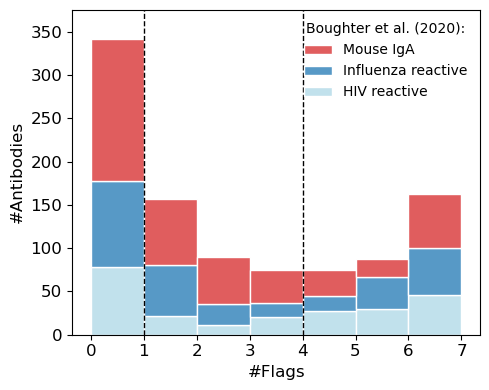

In [5]:
#%% Distribution of poly-reactive antibodies (#flags from ELISA assays):

# --- Set fonts globally:
params = {'legend.title_fontsize': 'medium',
          'legend.fontsize': 'medium',
          'figure.figsize': (6, 4),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'}
pylab.rcParams.update(params)

plt.figure(3,figsize=(5,4))
s = sns.histplot(data=Data, 
                 x='react', 
                 binwidth=0.999,
                 hue='Ab type',
                 multiple="stack",
                 palette=['tab:red','tab:blue','lightblue'],
                 alpha=0.75,
                 edgecolor= 'w',
                 linewidth=1,
                 )
plt.xticks(np.arange(0, 8, 1))
plt.vlines(x=1, ymin=0.0, ymax=400, color='k',linestyles='dashed',linewidth=1)
plt.vlines(x=4, ymin=0.0, ymax=400, color='k',linestyles='dashed',linewidth=1)
plt.ylim((0,375))
plt.xlabel('#Flags')
plt.ylabel('#Antibodies')
#plt.title('Distribution of Boughter et al. (2020) dataset')
sns.move_legend(
    s, "upper right",
    #bbox_to_anchor=(1.25, 0.5), 
    ncol=1, 
    title='Boughter et al. (2020):' ,#None, 
    frameon=False,
    borderaxespad=0.5,
    )
plt.rcParams["patch.force_edgecolor"] = False
plt.tight_layout()
plt.savefig('./Figures/Fig1B_DistPlot.pdf',dpi=300)
plt.show()
